In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats.mstats import winsorize

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

%matplotlib inline
# %matplotlib notebook

plt.rcParams["figure.figsize"] = (10,6)
# plt.rcParams['figure.dpi'] = 100

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

pd.options.display.max_rows = 1000
pd.options.display.max_columns = 150

In [2]:
df = pd.read_csv("filled_scout.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15919 non-null  object 
 1   body_type            15919 non-null  object 
 2   price                15919 non-null  int64  
 3   km                   15919 non-null  float64
 4   type                 15919 non-null  object 
 5   previous_owners      15919 non-null  float64
 6   inspection_new       15919 non-null  int64  
 7   make                 15919 non-null  object 
 8   model                15919 non-null  object 
 9   paint_type           15919 non-null  object 
 10  nr_of_doors          15919 non-null  float64
 11  nr_of_seats          15919 non-null  float64
 12  gearing_type         15919 non-null  object 
 13  drive_chain          15919 non-null  object 
 14  fuel                 15919 non-null  object 
 15  co2_emission         15919 non-null 

In [4]:
# converting not necessarily float types to integers
df.previous_owners = df.previous_owners.astype(int)
df.nr_of_doors = df.nr_of_doors.astype(int)
df.nr_of_seats = df.nr_of_seats.astype(int)
df.gears = df.gears.astype(int)
df.age = df.age.astype(int)
df.warranty_months = df.warranty_months.astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15919 non-null  object 
 1   body_type            15919 non-null  object 
 2   price                15919 non-null  int64  
 3   km                   15919 non-null  float64
 4   type                 15919 non-null  object 
 5   previous_owners      15919 non-null  int32  
 6   inspection_new       15919 non-null  int64  
 7   make                 15919 non-null  object 
 8   model                15919 non-null  object 
 9   paint_type           15919 non-null  object 
 10  nr_of_doors          15919 non-null  int32  
 11  nr_of_seats          15919 non-null  int32  
 12  gearing_type         15919 non-null  object 
 13  drive_chain          15919 non-null  object 
 14  fuel                 15919 non-null  object 
 15  co2_emission         15919 non-null 

In [5]:
# Handling with outlier, we must look at the numeric columns. But we cannot change anything in the price column. 
# Because it is our target column.

<AxesSubplot:xlabel='age', ylabel='km'>

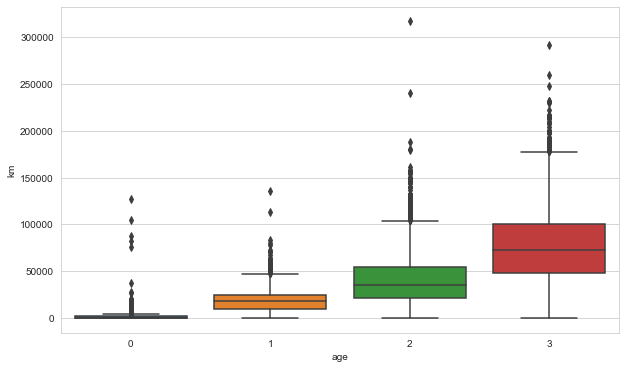

In [6]:
sns.boxplot(df.age, df.km)

In [7]:
df.groupby("age").km.describe()

,count,mean,std,min,25%,50%,75%,max
age,,,,,,,,
0,4435.000,1652.171,4259.045,0.000,10.000,100.000,1652.171,127022.000
1,4528.000,18035.100,11000.167,1.000,10000.000,18000.000,25000.000,136000.000
2,3277.000,41748.937,28275.004,1.000,21580.000,34772.000,54740.000,317000.000
3,3679.000,77450.063,39145.119,10.000,48000.000,72945.000,99950.000,291800.000


<AxesSubplot:xlabel='km', ylabel='type'>

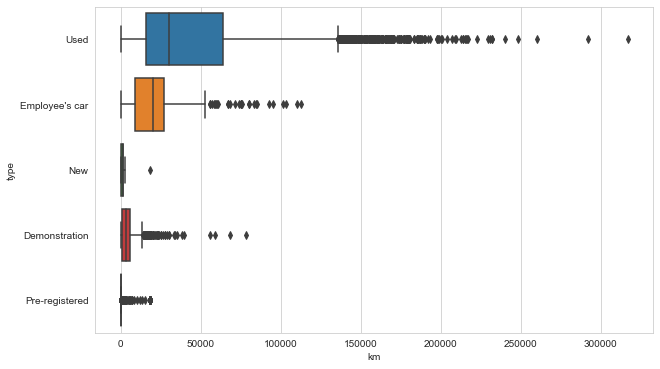

In [8]:
sns.boxplot(df.km,df.type)

In [9]:
# km can vary depending on the owners travelling habbits.

<AxesSubplot:xlabel='age', ylabel='previous_owners'>

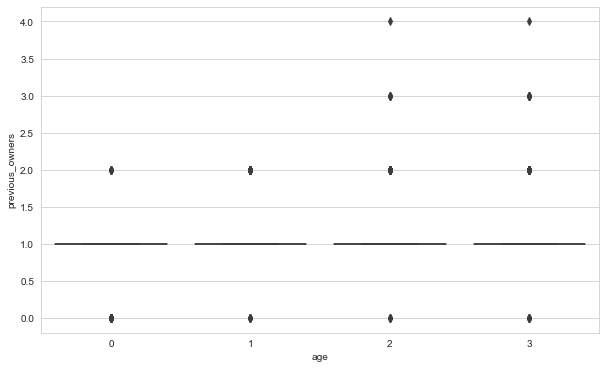

In [10]:
sns.boxplot(df.age, df.previous_owners)  ## it doesn't seem like there is any outlier.

## inspection_new

In [11]:
df.inspection_new.value_counts(dropna=False)  # no outlier

0    11987
1     3932
Name: inspection_new, dtype: int64

## nr_of_doors

In [12]:
df.nr_of_doors.value_counts(dropna=False)

5    11778
4     3088
3      832
2      219
1        1
7        1
Name: nr_of_doors, dtype: int64

In [13]:
# there aren't any cars with 1 door or 7 doors. so we must correct the values.

df[df.nr_of_doors == 1]

,make_model,body_type,price,km,type,previous_owners,inspection_new,make,model,paint_type,nr_of_doors,nr_of_seats,gearing_type,drive_chain,fuel,co2_emission,emission_class,comfort_convenience,entertainment_media,extras,safety_security,gears,age,hp_kW,warranty_months,displacement_cc,weight_kg,cons_comb
13782,Renault Clio,Compact,8500,41493.000,Used,1,0,Renault,Clio,Metallic,1,5,Manual,front,diesel,85.000,Euro 6,-,"Bluetooth,Hands-free equipment,On-board comput...",Alloy wheels,"ABS,Central door lock,Daytime running lights,D...",5,3,55.000,12,1461.000,1146.000,3.300


In [14]:
df[(df.make_model=="Renault Clio")&(df.body_type=="Compact")].nr_of_doors.value_counts()

5    313
4    170
1      1
Name: nr_of_doors, dtype: int64

In [15]:
df.nr_of_doors.replace(1,5,inplace=True)

In [16]:
df[df.nr_of_doors == 7]

,make_model,body_type,price,km,type,previous_owners,inspection_new,make,model,paint_type,nr_of_doors,nr_of_seats,gearing_type,drive_chain,fuel,co2_emission,emission_class,comfort_convenience,entertainment_media,extras,safety_security,gears,age,hp_kW,warranty_months,displacement_cc,weight_kg,cons_comb
15202,Renault Espace,Van,21600,78000.000,Used,1,0,Renault,Espace,Metallic,7,5,Automatic,front,diesel,120.000,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Digital radio,MP3,On-board computer,...","Alloy wheels,Touch screen","ABS,Blind spot monitor,Central door lock,Dayti...",6,3,118.000,12,1598.000,1734.000,4.600


In [17]:
df[(df.make_model=="Renault Espace")&(df.body_type=="Van")].nr_of_doors.value_counts()

5    686
4     90
7      1
Name: nr_of_doors, dtype: int64

In [18]:
df.nr_of_doors.replace(7,5, inplace=True)

In [19]:
df.nr_of_doors.value_counts(dropna=False)

5    11780
4     3088
3      832
2      219
Name: nr_of_doors, dtype: int64

## nr_of_seats

In [20]:
df.nr_of_seats.value_counts(dropna=False)

5    14308
4     1127
7      362
2      119
6        2
3        1
Name: nr_of_seats, dtype: int64

In [21]:
# if the body_type is van or transporter, then 6 or 7 can make sense. 2 seats are possible if it is coupe or commercial va-ehicle

df[df.nr_of_seats==7].groupby(["make_model","body_type"]).nr_of_seats.value_counts()

make_model      body_type      nr_of_seats
Renault Espace  Compact        7                2
                Off-Road       7                3
                Sedans         7               13
                Station wagon  7               19
                Transporter    7               16
                Van            7              309
Name: nr_of_seats, dtype: int64

In [22]:
# sedans generally have 5 seats. compact cars are relatively small cars. so their seat numbers vary from 2 to 5. 
# the other body_types can have 7 seats. 
df.loc[(df.make_model=="Renault Espace")&(df.body_type == "Compact")]

,make_model,body_type,price,km,type,previous_owners,inspection_new,make,model,paint_type,nr_of_doors,nr_of_seats,gearing_type,drive_chain,fuel,co2_emission,emission_class,comfort_convenience,entertainment_media,extras,safety_security,gears,age,hp_kW,warranty_months,displacement_cc,weight_kg,cons_comb
15134,Renault Espace,Compact,23990,36682.000,Used,1,0,Renault,Espace,Metallic,5,5,Automatic,front,diesel,120.000,Euro 6,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Hands-free equipment,Radio","Alloy wheels,Roof rack","ABS,Daytime running lights,Driver-side airbag,...",6,2,119.000,12,1598.000,1734.000,4.700
15196,Renault Espace,Compact,21900,32507.000,Used,1,0,Renault,Espace,Uni/basic,5,5,Automatic,front,diesel,120.000,Euro 6,"Air conditioning,Automatic climate control,Cru...",Bluetooth,Alloy wheels,"ABS,Driver-side airbag,Electronic stability co...",6,3,118.000,12,1598.000,1734.000,4.700
15274,Renault Espace,Compact,17900,72200.000,Used,1,0,Renault,Espace,Metallic,4,7,Automatic,front,benzine,140.000,Euro 6,-,Bluetooth,Alloy wheels,"ABS,Adaptive Cruise Control,Blind spot monitor...",7,3,147.000,12,1618.000,1621.000,6.200
15455,Renault Espace,Compact,33500,100.000,Used,1,0,Renault,Espace,Metallic,5,5,Automatic,front,diesel,120.000,Euro 6,-,Bluetooth,Alloy wheels,"ABS,Adaptive Cruise Control,Blind spot monitor...",6,0,118.000,24,1598.000,1734.000,4.700
15805,Renault Espace,Compact,43000,1000.000,Used,1,0,Renault,Espace,Metallic,5,5,Automatic,front,diesel,120.000,Euro 6,-,Bluetooth,Alloy wheels,"ABS,Adaptive Cruise Control,Blind spot monitor...",6,0,147.000,24,1618.000,1758.000,5.700
15905,Renault Espace,Compact,39990,500.000,Demonstration,1,0,Renault,Espace,Metallic,5,7,Automatic,front,benzine,153.000,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Digital radio,Hands-free equipment,M...","Alloy wheels,Touch screen","ABS,Adaptive Cruise Control,Blind spot monitor...",6,0,165.000,36,1798.000,1760.000,6.800


In [23]:
df.loc[(df.make_model=="Renault Espace")&(df.body_type == "Compact"),"nr_of_seats"] = df.loc[(df.make_model=="Renault Espace")&(df.body_type == "Compact")].nr_of_seats.replace(7,5)

In [24]:
df.loc[(df.make_model=="Renault Espace")&(df.body_type == "Sedans")].nr_of_seats.value_counts()

5    42
7    13
Name: nr_of_seats, dtype: int64

In [25]:
df.loc[(df.make_model=="Renault Espace")&(df.body_type == "Sedans"),"nr_of_seats"] = df.loc[(df.make_model=="Renault Espace")&(df.body_type == "Sedans")].nr_of_seats.replace(7,5)

In [26]:
df.nr_of_seats.value_counts(dropna=False)

5    14323
4     1127
7      347
2      119
6        2
3        1
Name: nr_of_seats, dtype: int64

In [27]:
df[df.nr_of_seats==6]

,make_model,body_type,price,km,type,previous_owners,inspection_new,make,model,paint_type,nr_of_doors,nr_of_seats,gearing_type,drive_chain,fuel,co2_emission,emission_class,comfort_convenience,entertainment_media,extras,safety_security,gears,age,hp_kW,warranty_months,displacement_cc,weight_kg,cons_comb
582,Audi A1,Compact,13500,100000.000,Used,1,0,Audi,A1,Metallic,5,6,Manual,front,benzine,105.000,Euro 6,Air conditioning,On-board computer,Alloy wheels,ABS,5,2,70.000,12,1000.000,1500.000,4.400
15890,Renault Espace,Station wagon,42490,1652.171,New,1,0,Renault,Espace,Metallic,5,6,Automatic,front,diesel,168.000,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Touch screen","ABS,Blind spot monitor,Central door lock,Dayti...",6,0,147.000,36,1997.000,1840.000,5.700


In [28]:
df.loc[(df.make_model=="Renault Espace")&(df.body_type == "Station wagon")].nr_of_seats.value_counts()

5    71
7    19
6     1
Name: nr_of_seats, dtype: int64

In [29]:
df.loc[(df.make_model=="Renault Espace")&(df.body_type == "Station wagon"),"nr_of_seats"] = df.loc[(df.make_model=="Renault Espace")&(df.body_type == "Station wagon")].nr_of_seats.replace(6,5)

In [30]:
df.loc[(df.make_model=="Audi A1")&(df.body_type == "Compact")].nr_of_seats.value_counts()

5    606
4    431
3      1
6      1
Name: nr_of_seats, dtype: int64

In [31]:
df.loc[(df.make_model=="Audi A1")&(df.body_type == "Compact"),"nr_of_seats"] = df.loc[(df.make_model=="Audi A1")&(df.body_type == "Compact")].nr_of_seats.replace(6,5)
df.loc[(df.make_model=="Audi A1")&(df.body_type == "Compact"),"nr_of_seats"] = df.loc[(df.make_model=="Audi A1")&(df.body_type == "Compact")].nr_of_seats.replace(3,4)

In [32]:
df.nr_of_seats.value_counts(dropna=False)

5    14325
4     1128
7      347
2      119
Name: nr_of_seats, dtype: int64

## co2_emission

<AxesSubplot:xlabel='co2_emission'>

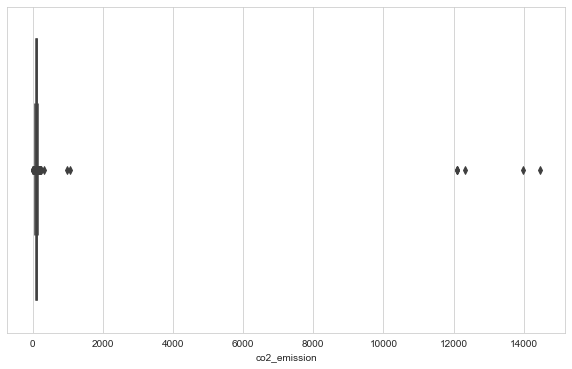

In [33]:
sns.boxplot(df.co2_emission)

In [34]:
df.co2_emission.sort_values(ascending=False).head(10)

11888   14457.000
12343   13983.000
8542    12324.000
6579    12087.000
6578    12087.000
5818    12087.000
4089     1060.000
4556      990.000
535       331.000
10513     253.000
Name: co2_emission, dtype: float64

In [35]:
df.loc[df.co2_emission>331.000,"co2_emission"] = np.nan

<AxesSubplot:xlabel='co2_emission', ylabel='Density'>

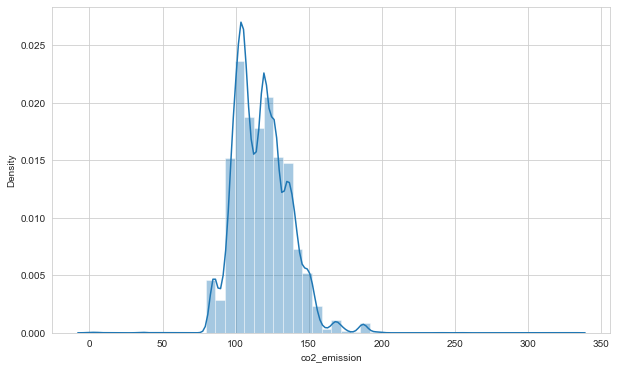

In [36]:
sns.distplot(df.co2_emission)

In [37]:
df.groupby("fuel").co2_emission.value_counts()

fuel      co2_emission
Electric  36.000            4
          114.000           1
LPG       94.000           15
          98.000           13
          113.000          10
          91.000            9
          97.000            6
          117.000           3
          95.000            2
          124.000           2
          110.000           1
          122.000           1
          128.000           1
          135.000           1
benzine   120.000         598
          128.000         521
          117.000         365
          124.000         352
          125.000         332
          102.000         306
          105.000         293
          97.000          288
          110.000         256
          104.000         251
          127.000         249
          139.000         245
          126.000         242
          113.000         226
          140.000         216
          108.000         210
          111.000         196
          114.000         182
          129.000

In [38]:
## smaller values could be related to electric vehicles. but they are not. so they are definitely outliers.
df.co2_emission.describe()

count   15911.000
mean      117.721
std        18.288
min         0.000
25%       104.000
50%       117.000
75%       128.000
max       331.000
Name: co2_emission, dtype: float64

In [39]:
# except for electric vehicles, less than 80 is irreasonable. so we can drop them.
df.loc[(df.fuel!="Electric")&(df.co2_emission<80) ,"co2_emission"] = np.nan

In [40]:
def fill(df, group_col1, group_col2, col_name, method): # method can be either "mode" or "mean" or "median" or "ffill"
    
    '''Fills the missing values with "mode/mean/median/ffill/bfill method" according to double-stage grouping'''
    
    if method == "mode":
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond1 = df[group_col1]==group1
                cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
                mode1 = list(df[cond1][col_name].mode())
                mode2 = list(df[cond2][col_name].mode())
                if mode2 != []:
                    df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[cond2][col_name].mode()[0])
                elif mode1 != []:
                    df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[cond1][col_name].mode()[0])
                else:
                    df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[col_name].mode()[0])

    elif method == "mean":
        df[col_name].fillna(df.groupby([group_col1, group_col2])[col_name].transform("mean"), inplace = True)
        df[col_name].fillna(df.groupby(group_col1)[col_name].transform("mean"), inplace = True)
        df[col_name].fillna(df[col_name].mean(), inplace = True)
        
    elif method == "median":
        df[col_name].fillna(df.groupby([group_col1, group_col2])[col_name].transform("median"), inplace = True)
        df[col_name].fillna(df.groupby(group_col1)[col_name].transform("median"), inplace = True)
        df[col_name].fillna(df[col_name].median(), inplace = True)
        
    elif method == "ffill":           
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
                df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(method="ffill").fillna(method="bfill")
                
        for group1 in list(df[group_col1].unique()):
            cond1 = df[group_col1]==group1
            df.loc[cond1, col_name] = df.loc[cond1, col_name].fillna(method="ffill").fillna(method="bfill")            
           
        df[col_name] = df[col_name].fillna(method="ffill").fillna(method="bfill")
    
    print("Number of NaN : ",df[col_name].isnull().sum())
    print("------------------")
    print(df[col_name].value_counts(dropna=False))

In [41]:
fill(df, "make_model", "fuel", "co2_emission", "mean")

Number of NaN :  0
------------------
120.000    1081
105.000     656
99.000      617
135.000     591
97.000      537
128.000     535
104.000     501
102.000     477
85.000      459
103.000     445
114.000     383
117.000     381
101.000     372
124.000     372
125.000     365
107.000     362
108.000     362
119.000     361
106.000     349
139.000     334
126.000     282
118.000     270
110.000     266
127.000     257
111.000     237
113.000     237
109.000     234
140.000     218
129.000     213
92.000      198
130.000     180
123.000     178
150.000     174
112.000     171
143.000     171
95.000      161
116.000     157
98.000      156
141.000     156
153.000     150
136.000     145
133.000     145
137.000     133
134.000     130
145.000     126
149.000     117
147.000     109
132.000     100
115.000      86
122.000      83
121.000      82
138.000      75
93.000       66
142.000      58
168.000      58
131.000      48
148.000      48
94.000       43
154.000      40
144.000      40
10

<AxesSubplot:xlabel='co2_emission'>

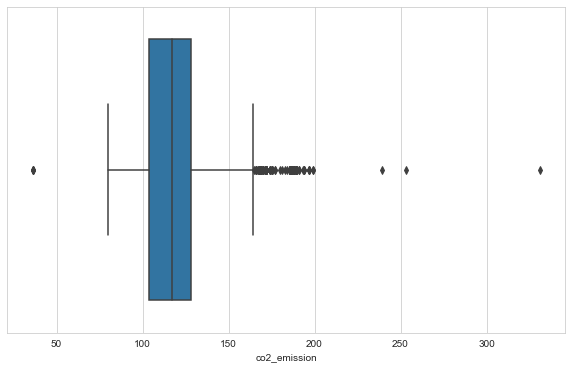

In [42]:
sns.boxplot(df.co2_emission)

## gears

In [43]:
df.gears.value_counts()

6    8614
5    4257
7    2810
8     225
9       6
1       2
3       2
4       2
2       1
Name: gears, dtype: int64

In [44]:
df.groupby("gearing_type").gears.value_counts()

gearing_type    gears
Automatic       6        4326
                7        2531
                8         222
                5         207
                9           6
                3           2
                4           2
                1           1
Manual          6        4147
                5        3991
                7          11
                8           3
                2           1
Semi-automatic  7         268
                6         141
                5          59
                1           1
Name: gears, dtype: int64

In [45]:
df[df.gears==4][["make_model","body_type","type"]]  

,make_model,body_type,type
15822,Renault Espace,Van,New
15823,Renault Espace,Van,New


In [46]:
df[(df.make_model == "Renault Espace")&(df.body_type=="Van")].gears.value_counts()

6    667
7    100
9      6
3      2
4      2
Name: gears, dtype: int64

In [47]:
df.loc[(df.make_model == "Renault Espace")&(df.body_type=="Van"),"gears"] = df.loc[(df.make_model == "Renault Espace")&(df.body_type=="Van"),"gears"].replace(9,7)
df.loc[(df.make_model == "Renault Espace")&(df.body_type=="Van"),"gears"] = df.loc[(df.make_model == "Renault Espace")&(df.body_type=="Van"),"gears"].replace([3,4],6)

In [48]:
df[df.gears==1][["make_model","body_type","type"]]  

,make_model,body_type,type
8921,Opel Corsa,Compact,Used
14375,Renault Clio,Compact,Demonstration


In [49]:
df[df.gears==2][["make_model","body_type","type"]]  ## in my research, I saw that some of the automatic cars have 8 gears. so I won't change it.

,make_model,body_type,type
9812,Opel Corsa,Sedans,Used


In [50]:
df[df.gears==8][["make_model","body_type","gearing_type"]] 

,make_model,body_type,gearing_type
215,Audi A1,Compact,Automatic
1033,Audi A1,Sedans,Automatic
10151,Opel Corsa,Compact,Automatic
10483,Opel Insignia,Station wagon,Automatic
10550,Opel Insignia,Station wagon,Automatic
10818,Opel Insignia,Off-Road,Automatic
11242,Opel Insignia,Station wagon,Automatic
11250,Opel Insignia,Sedans,Automatic
11304,Opel Insignia,Station wagon,Automatic
11305,Opel Insignia,Station wagon,Automatic


In [51]:
df.gears.replace([1,2],np.nan, inplace=True)
fill(df, "make_model", "gearing_type", "gears", "mode")

Number of NaN :  0
------------------
6.000    8619
5.000    4259
7.000    2816
8.000     225
Name: gears, dtype: int64


## age

In [52]:
df.age.value_counts()

1    4528
0    4435
3    3679
2    3277
Name: age, dtype: int64

## hp_kW

In [53]:
df.hp_kW.value_counts()

85.000     2543
66.000     2125
81.000     1403
100.000    1315
110.000    1113
70.000      890
125.000     710
51.000      695
55.000      589
118.000     550
92.000      466
121.000     392
147.000     380
77.000      353
56.000      294
54.000      276
103.000     253
87.000      232
165.000     194
88.000      177
60.000      160
162.000      98
74.000       81
96.000       72
71.000       59
101.000      47
67.000       40
154.000      39
122.000      35
119.000      30
164.000      27
135.000      24
52.000       22
82.000       22
78.000       20
1.000        20
146.000      18
294.000      18
141.000      16
57.000       10
120.000       8
104.000       8
191.000       7
112.000       7
155.000       6
117.000       6
184.000       5
76.000        4
65.000        4
90.000        4
80.000        3
98.000        3
168.000       3
93.000        3
149.000       3
150.000       2
89.000        2
63.000        2
86.000        2
53.000        2
270.000       2
127.000       2
228.000 

<AxesSubplot:xlabel='hp_kW'>

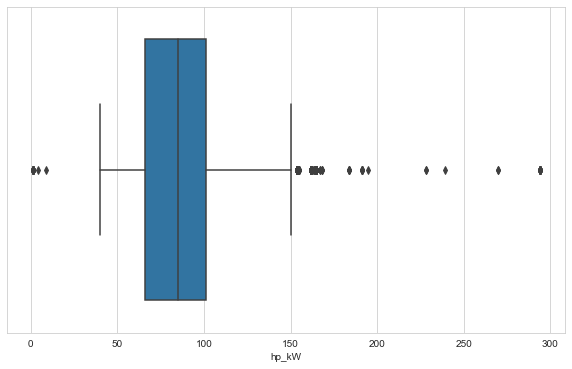

In [54]:
sns.boxplot(df.hp_kW)

<AxesSubplot:xlabel='hp_kW', ylabel='make_model'>

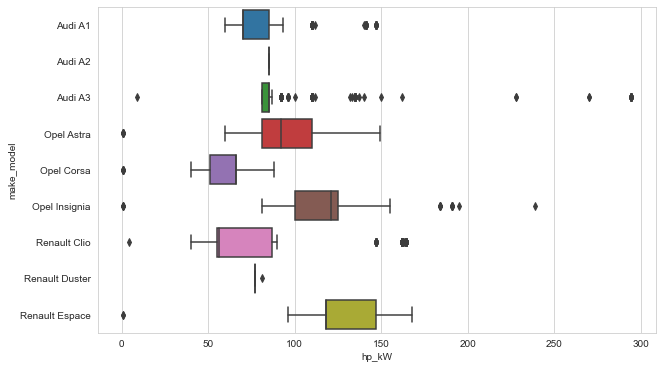

In [55]:
sns.boxplot(df.hp_kW, df.make_model)

In [56]:
df.groupby("make_model").hp_kW.describe()

,count,mean,std,min,25%,50%,75%,max
make_model,,,,,,,,
Audi A1,2614.000,76.661,12.557,60.000,70.000,70.000,85.000,147.000
Audi A2,1.000,85.000,NaN,85.000,85.000,85.000,85.000,85.000
Audi A3,3097.000,90.192,19.948,9.000,81.000,85.000,85.000,294.000
Opel Astra,2526.000,92.662,17.055,1.000,81.000,92.000,110.000,149.000
Opel Corsa,2219.000,60.258,7.997,1.000,51.000,66.000,66.000,88.000
Opel Insignia,2598.000,114.333,17.385,1.000,100.000,121.000,125.000,239.000
Renault Clio,1839.000,71.121,28.573,4.000,55.000,56.000,87.000,164.000
Renault Duster,34.000,77.118,0.686,77.000,77.000,77.000,77.000,81.000
Renault Espace,991.000,129.952,21.974,1.000,118.000,118.000,147.000,168.000


In [57]:
df.loc[df.hp_kW<51,"hp_kW"] = np.nan

In [58]:
fill(df, "make_model", "body_type", "hp_kW", "mean")

Number of NaN :  0
------------------
85.000     2543
66.000     2125
81.000     1403
100.000    1315
110.000    1113
70.000      890
125.000     710
51.000      695
55.000      589
118.000     550
92.000      466
121.000     392
147.000     380
77.000      353
56.000      294
54.000      276
103.000     253
87.000      232
165.000     194
88.000      177
60.000      160
162.000      98
74.000       81
96.000       72
71.000       59
101.000      47
67.000       40
154.000      39
122.000      35
119.000      30
164.000      27
135.000      24
82.000       22
52.000       22
78.000       20
294.000      18
146.000      18
141.000      16
57.000       10
104.000       8
58.871        8
120.000       8
112.000       7
191.000       7
117.000       6
155.000       6
184.000       5
76.000        4
90.465        4
65.000        4
90.000        4
116.681       4
98.000        3
80.000        3
168.000       3
149.000       3
95.936        3
93.000        3
150.000       2
127.000       2
63

## warranty_month

In [59]:
df.warranty_months.value_counts()

12    9220
24    5177
36     494
60     401
21     168
48     149
6      125
72      59
3       33
23      11
18      10
20       7
25       6
2        5
26       4
50       4
16       4
13       3
1        3
34       3
19       3
4        3
45       2
28       2
17       2
9        2
14       2
22       2
46       2
11       2
15       1
30       1
7        1
8        1
10       1
65       1
49       1
33       1
56       1
40       1
47       1
Name: warranty_months, dtype: int64

<AxesSubplot:xlabel='age', ylabel='warranty_months'>

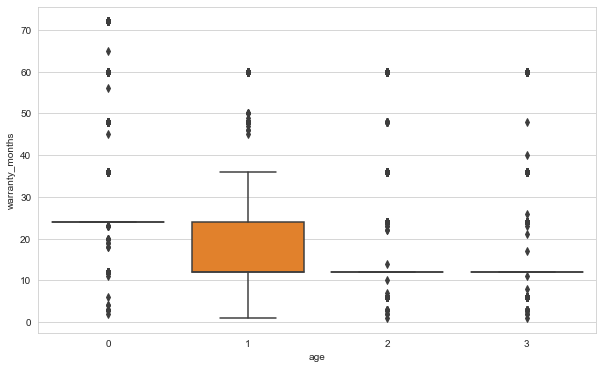

In [60]:
sns.boxplot(df.age, df.warranty_months)  ## I won't touch this column

## displacement_cc

In [61]:
df.displacement_cc.value_counts()

1598.000     4986
999.000      2466
1398.000     1349
1399.000      769
1229.000      708
1956.000      696
1461.000      662
1490.000      570
1422.000      472
898.000       367
1197.000      357
1395.000      325
1968.000      304
1149.000      291
1618.000      215
1798.000      214
1498.000      196
1600.000      130
1248.000      117
1364.000      104
1997.000      103
1400.000       90
998.000        72
1500.000       50
2000.000       46
1000.000       40
1.000          36
1998.000       26
2480.000       20
1984.000       18
1200.000       18
1397.000       11
899.000        11
160.000         6
929.000         5
1499.000        5
139.000         4
1596.000        4
997.000         4
900.000         4
1396.000        3
1599.000        3
1199.000        3
1589.000        2
2.000           2
995.000         2
1300.000        2
1495.000        2
15898.000       1
1568.000        1
1368.000        1
890.000         1
1239.000        1
1496.000        1
973.000         1
996.000   

In [62]:
df.displacement_cc.describe()

count   15919.000
mean     1425.406
std       330.917
min         1.000
25%      1229.000
50%      1461.000
75%      1598.000
max     16000.000
Name: displacement_cc, dtype: float64

<AxesSubplot:xlabel='displacement_cc'>

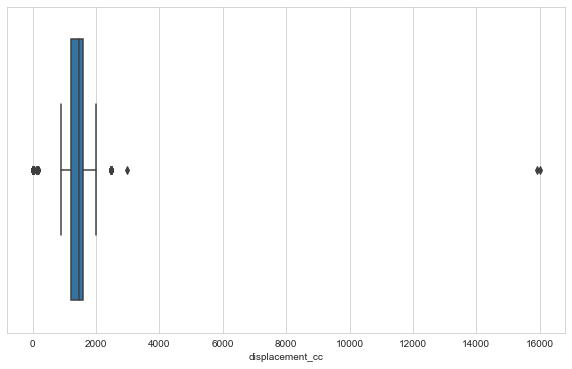

In [63]:
sns.boxplot(df.displacement_cc)

In [64]:
df.loc[df.displacement_cc>10000,"displacement_cc"]= np.nan

In [65]:
df.loc[df.displacement_cc<500,"displacement_cc"]= np.nan

In [66]:
fill(df, "make_model", "body_type", "displacement_cc", "mean")

Number of NaN :  0
------------------
1598.000    4986
999.000     2466
1398.000    1349
1399.000     769
1229.000     708
1956.000     696
1461.000     662
1490.000     570
1422.000     472
898.000      367
1197.000     357
1395.000     325
1968.000     304
1149.000     291
1618.000     215
1798.000     214
1498.000     196
1600.000     130
1248.000     117
1364.000     104
1997.000     103
1400.000      90
998.000       72
1500.000      50
2000.000      46
1000.000      40
1998.000      26
2480.000      20
1696.950      19
1200.000      18
1984.000      18
1286.663      15
1397.000      11
899.000       11
1691.632       6
1499.000       5
929.000        5
1596.000       4
900.000        4
1637.030       4
1353.845       4
997.000        4
1199.000       3
1599.000       3
1396.000       3
1576.040       2
1589.000       2
995.000        2
1497.015       2
1300.000       2
1495.000       2
1584.000       1
1568.000       1
1368.000       1
890.000        1
1239.000       1
1496.000  

## weight_kg

In [67]:
df.weight_kg.value_counts()

1163.000    1504
1335.000     908
1135.000     634
1165.000     544
1308.000     457
1666.000     451
1487.000     438
1734.000     437
1355.000     398
1225.000     364
1360.000     362
1195.000     325
1564.000     324
1273.000     317
1364.000     314
1180.000     274
1406.500     224
1278.000     211
1379.000     207
1199.000     205
1503.000     194
1059.000     156
1350.000     155
1280.000     153
1146.000     149
1685.000     137
1260.000     127
1552.000     121
1255.000     113
1275.000     112
1425.000     109
1200.000     107
1162.000     107
1522.000     103
1090.000      94
1345.000      92
1403.000      91
1279.000      91
1120.000      90
1659.000      89
1701.000      87
1250.000      85
1441.000      82
1285.000      80
1237.000      76
1110.000      75
1613.000      75
1230.000      74
1196.000      73
1065.000      71
1758.000      68
1733.000      68
1088.000      66
1071.000      64
1141.000      64
1325.000      64
1244.000      62
1845.000      56
1623.000      

<AxesSubplot:xlabel='weight_kg'>

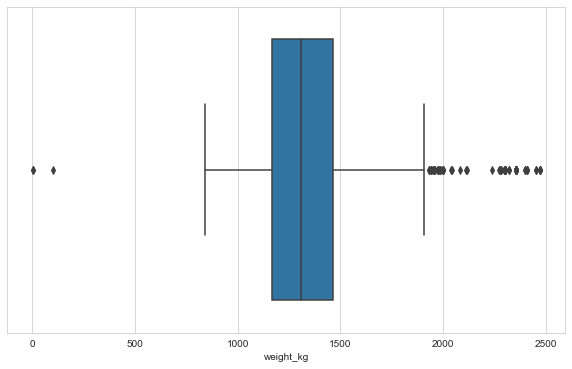

In [68]:
sns.boxplot(df.weight_kg)

In [69]:
df.loc[df.weight_kg<500,"weight_kg"] = np.nan

In [70]:
fill(df, "make_model", "body_type", "weight_kg", "mean")

Number of NaN :  0
------------------
1163.000    1504
1335.000     908
1135.000     634
1165.000     544
1308.000     457
1666.000     451
1487.000     438
1734.000     437
1355.000     398
1225.000     364
1360.000     362
1195.000     325
1564.000     324
1273.000     317
1364.000     314
1180.000     274
1406.500     224
1278.000     211
1379.000     207
1199.000     205
1503.000     194
1059.000     156
1350.000     155
1280.000     153
1146.000     149
1685.000     137
1260.000     127
1552.000     121
1255.000     113
1275.000     112
1425.000     109
1200.000     107
1162.000     107
1522.000     103
1090.000      94
1345.000      92
1279.000      91
1403.000      91
1120.000      90
1659.000      89
1701.000      87
1250.000      85
1441.000      82
1285.000      80
1237.000      76
1110.000      75
1613.000      75
1230.000      74
1196.000      73
1065.000      71
1758.000      68
1733.000      68
1088.000      66
1325.000      64
1071.000      64
1141.000      64
1244.000  

In [71]:
df[df.weight_kg>2000][["make_model", "body_type"]]  ## these can be heavy cars.

,make_model,body_type
10475,Opel Insignia,Station wagon
10600,Opel Insignia,Sedans
10618,Opel Insignia,Sedans
10623,Opel Insignia,Station wagon
10638,Opel Insignia,Station wagon
10646,Opel Insignia,Station wagon
10666,Opel Insignia,Sedans
10723,Opel Insignia,Sedans
10746,Opel Insignia,Sedans
10753,Opel Insignia,Sedans


## cons_comb

In [72]:
df.cons_comb.describe()

count   15919.000
mean        4.867
std         1.557
min         0.000
25%         4.100
50%         4.800
75%         5.400
max        55.000
Name: cons_comb, dtype: float64

<AxesSubplot:xlabel='cons_comb'>

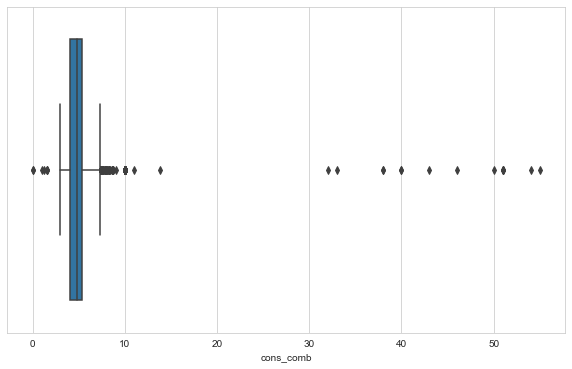

In [73]:
sns.boxplot(df.cons_comb)

In [74]:
df[df.cons_comb>12][["make_model","body_type", "displacement_cc"]]

,make_model,body_type,displacement_cc
500,Audi A1,Sedans,999.000
535,Audi A1,Compact,999.000
2194,Audi A1,Sedans,999.000
2196,Audi A1,Sedans,999.000
2210,Audi A1,Sedans,999.000
2237,Audi A1,Sedans,999.000
4089,Audi A3,Sedans,1598.000
4102,Audi A3,Sedans,1598.000
4556,Audi A3,Sedans,1598.000
4558,Audi A3,Sedans,1598.000


In [75]:
df[df.cons_comb<2][["make_model","body_type", "displacement_cc"]]

,make_model,body_type,displacement_cc
3612,Audi A3,Sedans,1395.000
3615,Audi A3,Sedans,1395.000
3617,Audi A3,Sedans,1395.000
8217,Opel Astra,Sedans,1399.000
10566,Opel Insignia,Station wagon,1956.000
13678,Renault Clio,Off-Road,1461.000
14902,Renault Duster,Off-Road,1598.000


In [76]:
df.loc[df.cons_comb>12,"cons_comb"] = np.nan
df.loc[df.cons_comb<2,"cons_comb"] = np.nan

In [77]:
fill(df, "make_model", "body_type", "cons_comb", "mean")

Number of NaN :  0
------------------
5.400     908
4.500     888
3.900     787
4.700     764
5.600     764
4.000     738
5.100     731
4.400     710
3.800     691
5.000     655
4.800     590
4.100     461
5.200     454
4.200     454
5.900     453
5.500     448
4.600     426
4.900     395
5.300     382
3.300     380
3.700     379
5.700     370
3.500     334
6.000     333
4.300     329
3.600     292
6.200     216
6.100     214
6.300     181
5.800     164
6.800     162
6.600     153
3.400     106
6.400      92
3.200      81
3.000      69
7.400      66
6.700      43
6.500      43
7.100      39
10.000     36
6.900      27
8.300      20
7.600      14
7.000      10
4.292       7
3.100       7
7.200       6
7.800       6
8.600       5
4.308       5
8.000       5
5.150       4
7.900       3
4.687       3
8.700       3
7.300       2
8.100       2
4.873       1
11.000      1
5.134       1
5.441       1
9.100       1
7.500       1
4.471       1
4.796       1
5.382       1
Name: cons_comb, dtype: 

## price

<AxesSubplot:xlabel='price'>

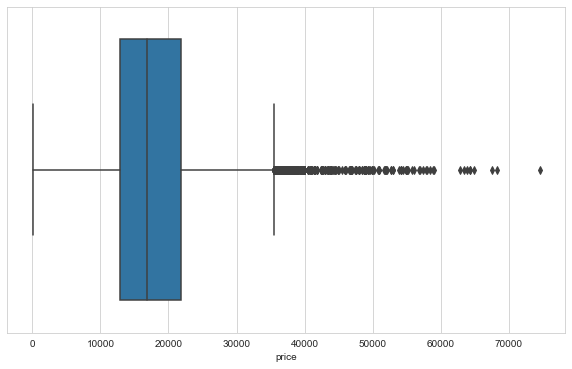

In [78]:
sns.boxplot(df.price)

In [79]:
df.price.describe()

count   15919.000
mean    18019.897
std      7386.169
min        13.000
25%     12850.000
50%     16900.000
75%     21900.000
max     74600.000
Name: price, dtype: float64

In [80]:
df[df.price<4000]

,make_model,body_type,price,km,type,previous_owners,inspection_new,make,model,paint_type,nr_of_doors,nr_of_seats,gearing_type,drive_chain,fuel,co2_emission,emission_class,comfort_convenience,entertainment_media,extras,safety_security,gears,age,hp_kW,warranty_months,displacement_cc,weight_kg,cons_comb
6066,Opel Astra,Station wagon,255,5563.000,Used,1,0,Opel,Astra,Metallic,5,5,Manual,front,diesel,101.000,Euro 6,"Air conditioning,Cruise control,Electrical sid...","Bluetooth,Hands-free equipment,On-board comput...",Roof rack,"ABS,Central door lock with remote control,Dayt...",6.000,1,100.000,12,1598.000,1403.000,3.800
8594,Opel Corsa,Sedans,13,123.000,Used,1,0,Opel,Corsa,Metallic,3,5,Manual,front,benzine,128.000,Euro 6,"Air conditioning,Cruise control,Electrical sid...","Bluetooth,CD player,Hands-free equipment,MP3,O...",Alloy wheels,"ABS,Adaptive headlights,Central door lock with...",5.000,1,66.000,12,1398.000,1141.000,5.600
8828,Opel Corsa,Compact,120,12.000,New,1,0,Opel,Corsa,Metallic,5,5,Manual,front,benzine,107.000,Euro 6,"Air conditioning,Automatic climate control,Cru...","Digital radio,On-board computer,Radio","Alloy wheels,Sport suspension","Central door lock,Daytime running lights,Drive...",6.000,0,66.000,24,999.000,1099.000,4.600
8829,Opel Corsa,Sedans,331,10.000,New,1,0,Opel,Corsa,Metallic,5,5,Manual,front,benzine,128.000,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Hands-free equipment,On-board computer,Radio","Alloy wheels,Sport package","ABS,Central door lock,Driver-side airbag,Elect...",6.000,0,66.000,24,999.000,1163.000,5.900


In [81]:
## WE CANNOT MANIPULATE THE TARGET COLUMN. BUT WE CAN DROP THE ROWS THAT DON'T MAKE SENSE.
drop_rows= df[df.price<4000].index
df.drop(drop_rows, axis=0, inplace=True)

## make_model

The Audi A2 (internally designated Typ 8Z) is a compact MPV-styled supermini car, with a five-door hatchback body style and four or five seats, produced by the German manufacturer Audi from November 1999 (for the 2000 model year) to August 2005 Source. So it is impossible to be a 1-year old Audi A2.

In [82]:
drop_index = df[df.make_model == "Audi A2"].index
df.drop(drop_index, axis=0, inplace=True)

## last arrangements

In [83]:
df_num = df.select_dtypes("number")
df_num

,price,km,previous_owners,inspection_new,nr_of_doors,nr_of_seats,co2_emission,gears,age,hp_kW,warranty_months,displacement_cc,weight_kg,cons_comb
0,15770,56013.000,2,1,5,5,99.000,7.000,3,66.000,12,1422.000,1220.000,3.800
1,14500,80000.000,1,0,3,4,129.000,7.000,2,141.000,12,1798.000,1255.000,5.600
2,14640,83450.000,1,0,4,4,99.000,7.000,3,85.000,12,1598.000,1225.000,3.800
3,14500,73000.000,1,0,3,4,99.000,6.000,3,66.000,12,1422.000,1195.000,3.800
4,16790,16200.000,1,1,5,5,109.000,7.000,3,66.000,12,1422.000,1195.000,4.100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15914,39950,1652.171,1,0,5,5,139.000,6.000,0,147.000,24,1997.000,1758.000,5.300
15915,39885,9900.000,1,0,5,5,168.000,7.000,0,165.000,36,1798.000,1708.000,7.400
15916,39875,15.000,1,1,5,7,139.000,6.000,0,146.000,36,1997.000,1779.000,5.300
15917,39700,10.000,1,0,5,7,139.000,6.000,0,147.000,36,1997.000,1758.000,5.300


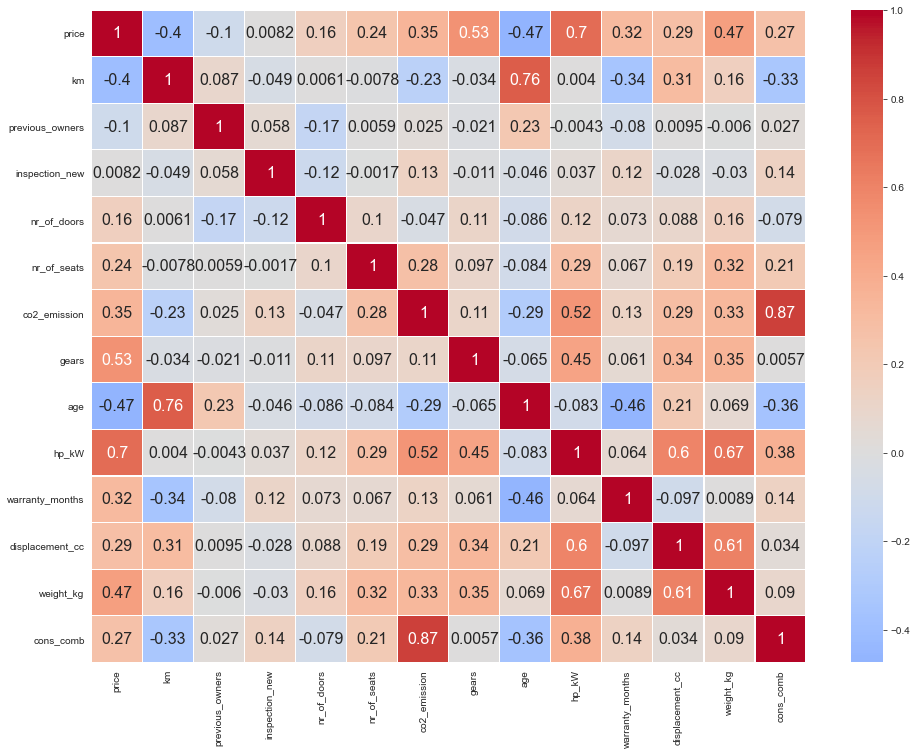

In [84]:
plt.figure(figsize=(16, 12))

sns.heatmap(df_num.corr(), annot=True, cmap="coolwarm",center=0, linewidths=0.2, annot_kws={"size": 16});

In [85]:
## make_model and model is the same. And make_model contains make. So we can drop these columns. 
## (I checked if there would be any difference between the models with and without these columns. And I saw that there was no difference)

In [86]:
df.drop(columns=["model","make"], inplace=True)

## dummy operation

In [87]:
df.to_csv("final_scout_not_dummy.csv", index=False)

In [88]:
df = df.join(df["comfort_convenience"].str.get_dummies(sep=",").add_prefix("cc_"))
df = df.join(df["entertainment_media"].str.get_dummies(sep=",").add_prefix("em_"))
df = df.join(df["extras"].str.get_dummies(sep = ",").add_prefix("ex_"))
df = df.join(df["safety_security"].str.get_dummies(sep=",").add_prefix("ss_"))

In [89]:
df.drop(["comfort_convenience", "entertainment_media", "extras", "safety_security"], axis=1, inplace=True)

In [90]:
df_final = pd.get_dummies(df, drop_first=True)

In [91]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15914 entries, 0 to 15918
Columns: 138 entries, price to emission_class_Euro 6
dtypes: float64(7), int32(5), int64(97), uint8(29)
memory usage: 14.0 MB


In [92]:
df_final.to_csv("final_scout_dummy.csv", index=False)